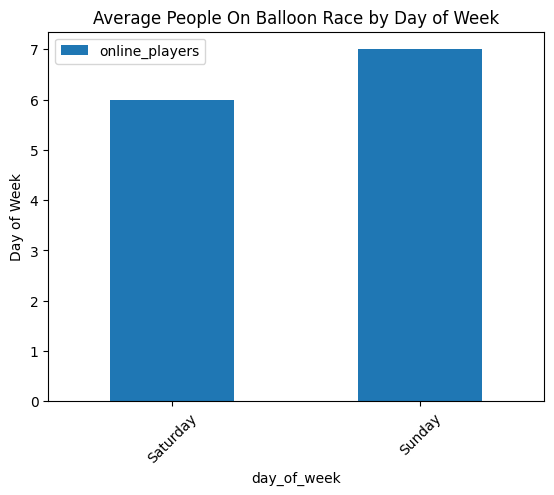

In [41]:
# find out when people are on

import pandas
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np

df = pandas.read_csv('tf2_balloon_log.txt', header=None)

df['date'] = df[0].str.slice(0, 10)
df['date'] = pandas.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df[0].str.slice(11, 13).astype(int)
df['hour'] = df['hour'].apply(
    lambda x: f"{x % 12 if x % 12 != 0 else 12}{' AM' if x < 12 else ' PM'}"
)
df['online_players'] = df[0].str.contains('Found people playing Balloon Race').astype(int)

graph_df = df[['date', 'day_of_week', 'online_players', 'hour']]

day_of_week_avg = (
    graph_df.groupby('day_of_week')['online_players'].sum() /
    graph_df.groupby('day_of_week')['date'].nunique()
).reset_index(name='online_players')


plot = day_of_week_avg.plot(
    x='day_of_week', y='online_players', kind='bar'
)
plt.xticks(rotation=45)
plt.ylabel('People playing') 
plt.ylabel('Day of Week') 

plt.title('Average People On Balloon Race by Day of Week')
plt.show()

# this needs to be an average for multiple weeks

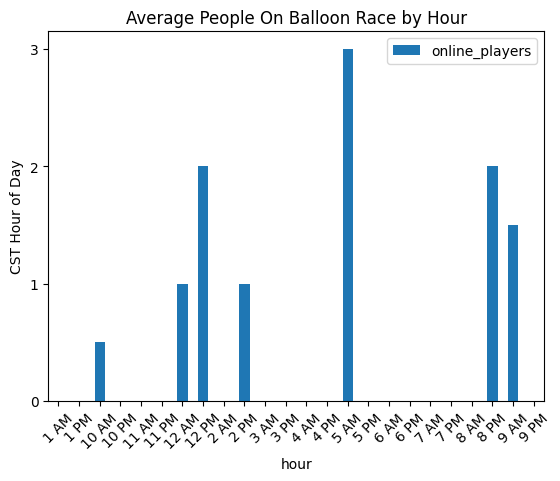

In [43]:
hourly_avg = (
    graph_df.groupby('hour')['online_players'].sum() /
    graph_df.groupby('hour')['date'].nunique()
).reset_index(name='online_players')


plot = hourly_avg.plot(
    x='hour', y='online_players', kind='bar'
)
plt.xticks(rotation=45)
plt.ylabel('People playing') 
plt.ylabel('CST Hour of Day') 

max_value = hourly_avg['online_players'].max()
plt.yticks(np.arange(0, np.ceil(max_value) + 1, 1))
plt.title('Average People On Balloon Race by Hour')
plt.show()
